In [10]:
# Import des librairie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import sklearn as sk

In [5]:
# Loading the data
test = pd.read_csv('dataset/test.csv')
train = pd.read_csv('dataset/train.csv')

In [8]:
# Verifion les dimensions des donnees
print('Dimension of train: {}'.format(train.shape))
print('Dimension of test: {}'.format(test.shape))

Dimension of train: (891, 12)
Dimension of test: (418, 11)


# Explorer les données

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


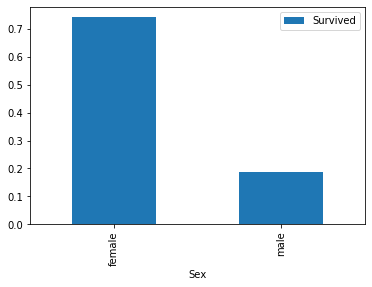

In [12]:
# Explorons les variables sex et Pclass
sex_pivot =  train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()

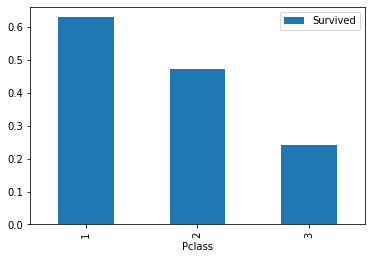

In [13]:
class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()

In [16]:
# Explorons et convertir la colonne d'age
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

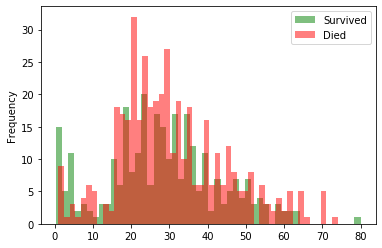

In [23]:
# Ceux qui ont survecu et non dans differentes tranche dages
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0 ]
survived['Age'].plot.hist(alpha=0.5,color='green', bins=50)
died['Age'].plot.hist(alpha=0.5, color='red', bins=50)
plt.legend(['Survived', 'Died'])
plt.show()

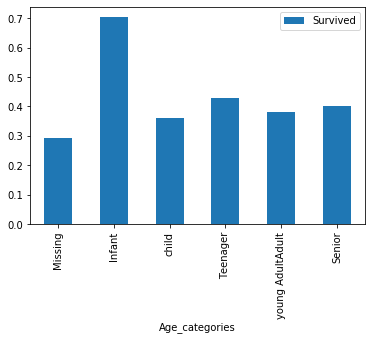

In [36]:
# Fonction pr remplacer les valeur manquante par -0.5 et convert la variable age en variable categorielle
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df
cut_points = [-1, 0, 5, 12, 18, 35, 60]
label_names = ['Missing', 'Infant', 'child', 'Teenager', 'young Adult' 'Adult', 'Senior']
train =  process_age(train, cut_points, label_names)
test =  process_age(test, cut_points, label_names)
pivot = train.pivot_table(index= 'Age_categories', values='Survived')
pivot.plot.bar()
plt.show()

# Préparer nos données pour l'apprentissage automatique

In [39]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [41]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

for column in ['Pclass', 'Sex', 'Age_categories']:
    train = create_dummies(train, column)
    test = create_dummies(test, column)

In [50]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_child',
       'Age_categories_Teenager', 'Age_categories_young AdultAdult',
       'Age_categories_Senior'],
      dtype='object')

# Création de notre premier modèle d'apprentissage automatique

In [52]:
# 1. Regression Logistique
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_categories_Missing',
           'Age_categories_Infant','Age_categories_child', 'Age_categories_Teenager', 'Age_categories_young AdultAdult',
           'Age_categories_Senior']

lr.fit(train[columns], train['Survived'])
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                  verbose=0, warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [60]:
holdout = test
from sklearn.model_selection import  train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_Y, test_size=0.20, random_state=0)


# Faire des prédictions et mesurer leur précision

In [61]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [62]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(test_y, predictions)

In [63]:
accuracy

0.8156424581005587

# Utilisation de la validation croisée pour une mesure d'erreur plus précise

In [64]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)


[0.76404494 0.76404494 0.76404494 0.79775281 0.79775281 0.8
 0.80898876 0.83146067 0.85393258 0.87640449]
0.8058426966292135


# Faire des prédictions sur des données invisibles

In [67]:
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])